# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
# data = pd.read_csv('/Users/nasty/Downloads/Яндекс Практикум/Проект Продажа квартир/Flat_data.csv')
# data

Данные склеились, разделились не запятыми, а \t. Используем метод sep по разделителю - здесь видно разделитель \t.

In [2]:
data = pd.read_csv('C:/Users/nasty/OneDrive/Документы/Яндекс Практикум/Проект Продажа квартир/Flat_data.csv', sep='\t')

In [3]:
pd.options.display.max_columns = 100 #откроем скрытые столбцы

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.shape

(23699, 22)

In [7]:
import matplotlib.pyplot as plt
plt.style.use('dark_background') 

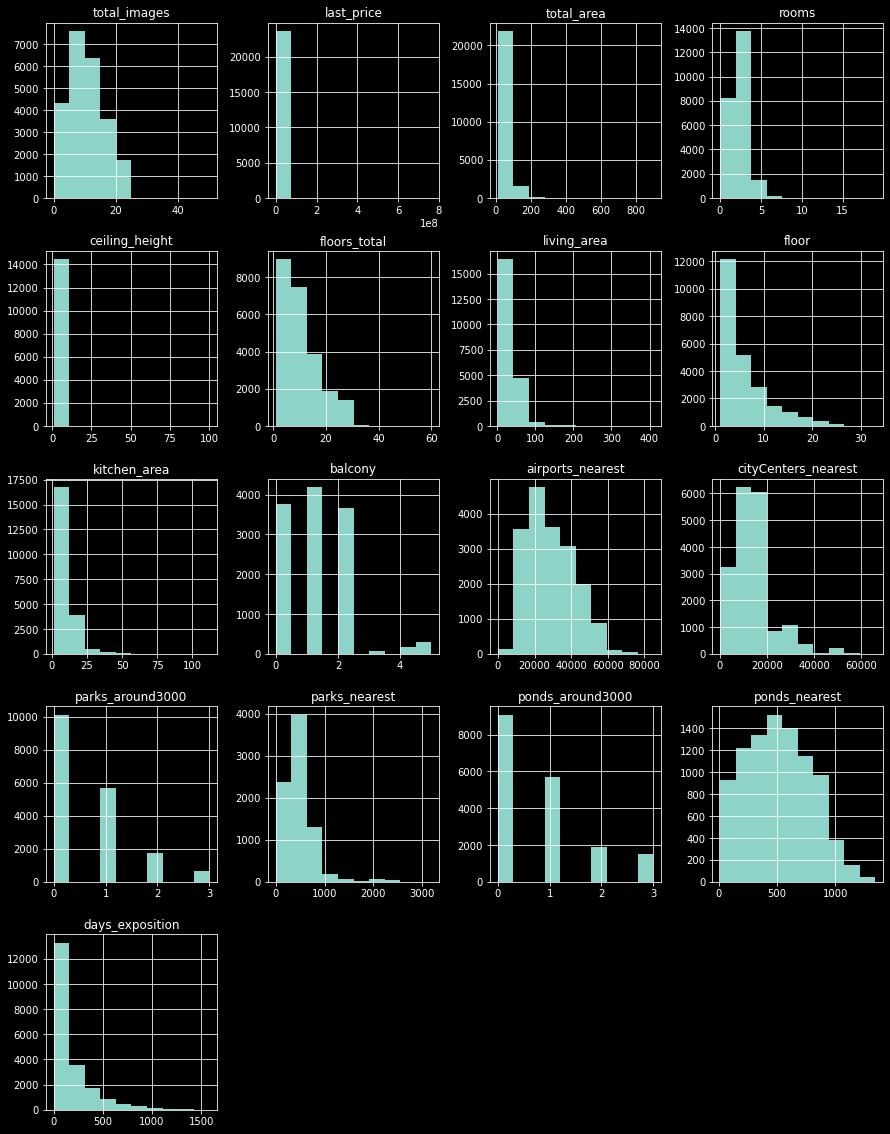

In [8]:
data.hist(figsize=(15, 20));

Описание данных

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

**balcony** — число балконов

**ceiling_height** — высота потолков (м)

**cityCenters_nearest** — расстояние до центра города (м)

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

**first_day_exposition** — дата публикации

**floor** — этаж

**floors_total** — всего этажей в доме

**is_apartment** — апартаменты (булев тип)

**kitchen_area** — площадь кухни в квадратных метрах (м²)

**last_price** — цена на момент снятия с публикации

**living_area** — жилая площадь в квадратных метрах (м²)

**locality_name** — название населённого пункта

**open_plan** — свободная планировка (булев тип)

**parks_around3000** — число парков в радиусе 3 км

**parks_nearest** — расстояние до ближайшего парка (м)

**ponds_around3000** — число водоёмов в радиусе 3 км

**ponds_nearest** — расстояние до ближайшего водоёма (м)

**rooms** — число комнат

**studio** — квартира-студия (булев тип)

**total_area** — площадь квартиры в квадратных метрах (м²)

**total_images** — число фотографий квартиры в объявлении

### Предобработка данных

In [9]:
data.duplicated().sum()

0

Строк дубликатов в данных нет. Посмотрим на пропуски.

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
data.isna().mean().sort_values(ascending = False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

Всего столбцов с пропусками - 14. Рассмотрим каждый из них.

#### Столбец ceiling_height

In [12]:
data['ceiling_height'].value_counts()

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

Количество пустых значений в столбце ceiling_height - 9195, что составляет около 39% от общего числа строк. Потерять такое количество, просто удалив, нельзя! Так как это количественные данные, а высота потолков может являться средним значением норм строительства, заменим пустые строки в данном столбце на медианное значение.

In [13]:
data['ceiling_height'].median()

2.65

Значение близко к нормальной высоте потолков по нормам - 2.7.

In [14]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [15]:
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


От пустых значений избавились.

Тип данных столбца ceiling_height - float. Здесь замены не требуется, тип данных определен верно.

Также, оценим все значения в этом столбце. Как видно, есть аномальные значения высоты потолков - будем считать таковыми все, что больше 10. Скорее всего, ошиблись с запятими и нулями. Разделим такие данные на 10.

In [16]:
sorted(data['ceiling_height'].unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,

In [17]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = round(data['ceiling_height'] / 10, 2)

In [18]:
sorted(data['ceiling_height'].unique())

[1.0,
 1.03,
 1.2,
 1.4,
 1.75,
 2.0,
 2.2,
 2.25,
 2.26,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,


После преобразования остались аномальные данные: потолки меньше 2-х метров и больше 6 скорее всего не являются нормой. Рассмотрим эти строки.

In [19]:
data[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,1.40,14.0,32.4,5,NaN,False,False,9.10,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,1.03,16.0,15.5,15,NaN,False,False,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [20]:
data[data['ceiling_height'] > 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,NaN,False,False,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,NaN,False,False,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,10.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Эти аномальные значения составляют малую часть, удалим их, чтобы не создавать шумов.

In [21]:
data = data[~(data['ceiling_height'] < 2)].copy()

In [22]:
data = data[~(data['ceiling_height'] > 6)].copy()

In [23]:
data[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [24]:
data[data['ceiling_height'] > 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [25]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### Столбец floors_total

In [26]:
data['floors_total'].value_counts()

5.0     5785
9.0     3761
16.0    1373
12.0    1361
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     552
18.0     505
24.0     469
8.0      390
2.0      382
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
Name: floors_total, dtype: int64

Количество пропущенных данных в столбце floors_total составляет меньше 1%. Можно было бы избавиться от таких данных, но сначала рассмотрим эти строки:

In [27]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Можно заметить, что в столбце floor люди указали свой этаж, при этом floors_total пустой. Проверим, так ли это:

In [28]:
data[(data['floors_total'].isna()) & (data['floor'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Гипотеза подтвердилась. Таких строк, где пустые значения и там, и там, нет. Хотя, это было видно еще из общей таблицы пропущенных значений - там пропусков в столбце floor вообще нет.

Предположу, что человек при составлении объявлении не стал вспоминать, какой этажности дом, и просто не указал это. Главное, указал на каком этаже его квартира. Заменим пропуски 0 значениями.

Почему я не стала заменять на номер, указанный в floor? Так как считаю, что это приведет к небольшому, но искажению данных: квартира окажется на последнем этаже(номера будут совпадать), последний и первый этажи влияют на выбор квартир. Многим не нравится жить под крышей(бывают протечки, что-то с отоплением). При дальнейшем распределении квартиры с floor_total можно будет отнести к варианту "Другие" при распределении по категориям.

In [29]:
data['floors_total'] = data['floors_total'].fillna('0')

In [30]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Тип данных float можно заменить на int, так как количество этажей целое число.

In [31]:
data['floors_total'] = data['floors_total'].astype('int')

In [32]:
sorted(data['floors_total'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 33,
 34,
 35,
 36,
 52,
 60]

Самое высокое здание в Санкт_Петербурге имеет высоту 37 этажей. Всё, что выше, скорее всего аномальные значения. Таких оказалось 2 строчки.

In [33]:
data[data['floors_total'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60,27.4,4,NaN,False,False,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52,10.5,18,NaN,False,False,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Удалим эти строки с аномалиями.

In [34]:
data = data[~(data['floors_total'] > 37)].copy()

In [35]:
data[data['floors_total'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [36]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### Столбец living_area

In [37]:
data['living_area'].value_counts()

18.00     882
17.00     675
30.00     598
16.00     486
20.00     481
         ... 
76.70       1
39.41       1
124.90      1
36.07       1
42.55       1
Name: living_area, Length: 1782, dtype: int64

Пропуски в столбце living_area составляют 8% от общего числа строк. Это не критично, но достаточно много. Посмотрим, что можно сделать с данными пропусками

Возьмем за возможную замену пропусков значение общей площади умноженное на коэффициент(отношение жилой площади в известных квартирах на общую сумму, где такая площадь дана.)

In [38]:
data_area = data[data['living_area'] > 0]

In [39]:
data_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.4,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
k_area = data_area['living_area'].sum() / data_area['total_area'].sum() 

In [41]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * k_area)

In [42]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Тип данных столбца living_area - float. Здесь замены не требуется, тип данных определен верно.

In [43]:
sorted(data['living_area'].unique())

[2.0,
 3.0,
 5.0,
 5.4,
 6.0,
 6.5,
 7.455090186195125,
 7.569783881367357,
 8.0,
 8.3,
 8.4,
 8.5,
 8.602027137917451,
 8.9,
 9.0,
 9.1,
 9.8,
 9.86365778481201,
 10.0,
 10.08,
 10.3,
 10.322432565500943,
 10.4,
 10.5,
 10.52,
 10.55,
 10.6,
 10.609166803431524,
 10.7,
 10.76,
 10.8,
 10.895901041362105,
 10.9,
 10.93,
 10.94,
 11.0,
 11.1,
 11.15,
 11.2,
 11.3,
 11.38,
 11.4,
 11.469369517223269,
 11.47,
 11.5,
 11.526716364809387,
 11.6,
 11.7,
 11.79,
 11.88,
 11.9,
 11.99,
 12.0,
 12.08,
 12.1,
 12.18,
 12.2,
 12.272225383428896,
 12.28,
 12.3,
 12.5,
 12.501612773773363,
 12.6,
 12.616306468945595,
 12.7,
 12.71,
 12.79,
 12.8,
 12.81,
 12.9,
 12.903040706876178,
 13.0,
 13.05,
 13.09,
 13.1,
 13.15,
 13.189774944806759,
 13.2,
 13.27,
 13.287264585703157,
 13.3,
 13.32,
 13.34,
 13.37,
 13.4,
 13.46,
 13.5,
 13.54,
 13.56,
 13.59,
 13.6,
 13.62,
 13.66,
 13.7,
 13.73,
 13.751774051150699,
 13.76,
 13.763243420667923,
 13.79,
 13.8,
 13.82,
 13.89,
 13.9,
 13.92,
 13.992630811012

Для удобства можно округлить только данные до 2-х знаков.

In [44]:
data['living_area'] = round(data['living_area'], 2)

Аномалии. По нормам, одна комната должна быть 9 кв. метров. В коммуналке - от 6 до 15 кв. метров. Скорее всего, все, что меньше 6 метров - аномальные значения. Посмотрим на них.

In [45]:
data[data['living_area'] < 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,2.65,17,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
17582,11,2680000.0,22.0,2018-08-11T00:00:00,0,2.65,25,5.0,8,NaN,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01T00:00:00,0,2.65,24,2.0,22,NaN,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
21943,15,6100000.0,77.6,2019-02-28T00:00:00,4,2.50,9,5.4,1,NaN,False,False,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.00,8,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Данные аномалии также удалим.

In [46]:
data = data[~(data['living_area'] < 6)].copy()

In [47]:
data[data['living_area'] < 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [48]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,91.18,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,44.01,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### Столбец is_apartment

Пропуски в столбце is_apartment составляют около 88% от общего числа. Практически все строки пустые! Удалять такое нельзя!

In [49]:
data['is_apartment'].value_counts()

False    2724
True       49
Name: is_apartment, dtype: int64

Скорее всего, человек при составлении объявления не указал, апартаменты это или нет. Если это не было указано, будем считать, что это квартиры - заменим значение на False.

In [50]:
data['is_apartment'] = data['is_apartment'].fillna('False')

In [51]:
data[data['is_apartment'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Тип данных заменим на булевый.

In [52]:
data['is_apartment'] = data['is_apartment'].astype('bool')

#### Столбец kitchen_area

In [53]:
data['kitchen_area'].value_counts()

6.00     1300
10.00    1261
8.00     1109
9.00     1100
7.00     1062
         ... 
12.56       1
11.84       1
13.27       1
13.17       1
13.83       1
Name: kitchen_area, Length: 970, dtype: int64

Создадим коэффициент площади кухни - среднее от деления суммы непустых значений площади кухни и сумму общей площади, где площадь кухни больше 0.

In [54]:
data_kitchen = data[data['kitchen_area'] > 0]

In [55]:
k_kitchen = data_kitchen['kitchen_area'].sum() / data_kitchen['total_area'].sum()

In [56]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * k_kitchen)

In [57]:
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [58]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,False,False,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,True,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,True,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,91.18,9,True,False,False,27.663891,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,False,False,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,True,False,False,9.100000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26,10.60,6,True,False,False,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24,41.06,22,True,False,False,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,True,False,False,8.810000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,True,False,False,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [59]:
sorted(data['kitchen_area'].unique())

[1.3,
 2.0,
 2.0878407969422694,
 2.261827530020792,
 2.2966248766364963,
 2.3,
 2.4,
 2.6098009961778366,
 2.696794362717098,
 2.783787729256359,
 2.89,
 2.9577744623348816,
 2.992571808950586,
 3.0,
 3.062166502181995,
 3.093484114136129,
 3.131761195413404,
 3.2,
 3.2187545619526654,
 3.270950581876222,
 3.288349255184074,
 3.3,
 3.3057479284919262,
 3.3927412950311875,
 3.4,
 3.4797346615704488,
 3.4971333348783014,
 3.5,
 3.56672802810971,
 3.5841267014175626,
 3.5963057727330594,
 3.618924048033267,
 3.6537213946489713,
 3.7,
 3.705917414572528,
 3.72331608788038,
 3.7528938325037293,
 3.758113434496085,
 3.775512107803937,
 3.7929107811117895,
 3.8,
 3.8085695870888565,
 3.810309454419641,
 3.827708127727494,
 3.862505474343198,
 3.8799041476510507,
 3.914701494266755,
 3.9494988408824594,
 4.0,
 4.001694860806016,
 4.012134064790727,
 4.031272605429366,
 4.053890880729573,
 4.06954968670664,
 4.071289554037425,
 4.088688227345277,
 4.097387563999203,
 4.1,
 4.10608690065313,
 4

In [60]:
data['kitchen_area'] = round(data['kitchen_area'], 2)

In [61]:
data[data['kitchen_area'] < 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9,12.00,1,True,True,False,2.96,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
906,15,2600000.0,27.00,2017-07-10T00:00:00,1,2.75,23,18.00,18,True,False,False,2.00,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
6262,9,3100000.0,24.00,2018-06-25T00:00:00,2,3.00,5,16.00,5,True,False,False,2.00,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
7950,3,5967734.0,66.40,2017-02-07T00:00:00,2,2.65,4,44.40,2,False,False,False,2.89,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,NaN,335.0
8729,9,2200000.0,18.40,2018-08-20T00:00:00,1,2.52,3,14.00,3,True,False,False,2.40,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0
8886,10,2450000.0,15.50,2018-08-22T00:00:00,0,2.65,5,10.00,2,True,True,False,2.70,NaN,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
9138,17,2920000.0,23.29,2018-12-12T00:00:00,1,2.65,3,21.00,1,True,False,False,2.00,NaN,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
9412,5,2100000.0,16.00,2017-12-10T00:00:00,0,2.65,6,13.00,1,True,False,True,2.78,NaN,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0
11033,6,5350000.0,32.00,2016-04-20T00:00:00,1,2.65,14,16.00,10,True,False,False,2.00,0.0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0
12040,5,1900000.0,15.00,2018-06-27T00:00:00,1,2.50,5,8.60,1,True,False,False,2.61,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [62]:
sorted(data['kitchen_area'].unique())

[1.3,
 2.0,
 2.09,
 2.26,
 2.3,
 2.4,
 2.61,
 2.7,
 2.78,
 2.89,
 2.96,
 2.99,
 3.0,
 3.06,
 3.09,
 3.13,
 3.2,
 3.22,
 3.27,
 3.29,
 3.3,
 3.31,
 3.39,
 3.4,
 3.48,
 3.5,
 3.57,
 3.58,
 3.6,
 3.62,
 3.65,
 3.7,
 3.71,
 3.72,
 3.75,
 3.76,
 3.78,
 3.79,
 3.8,
 3.81,
 3.83,
 3.86,
 3.88,
 3.91,
 3.95,
 4.0,
 4.01,
 4.03,
 4.05,
 4.07,
 4.09,
 4.1,
 4.11,
 4.12,
 4.14,
 4.17,
 4.18,
 4.19,
 4.2,
 4.21,
 4.22,
 4.25,
 4.26,
 4.28,
 4.29,
 4.3,
 4.31,
 4.33,
 4.35,
 4.36,
 4.38,
 4.4,
 4.41,
 4.42,
 4.43,
 4.44,
 4.45,
 4.46,
 4.47,
 4.49,
 4.5,
 4.51,
 4.52,
 4.53,
 4.54,
 4.55,
 4.56,
 4.59,
 4.6,
 4.61,
 4.63,
 4.65,
 4.66,
 4.68,
 4.7,
 4.72,
 4.73,
 4.75,
 4.76,
 4.77,
 4.78,
 4.79,
 4.8,
 4.82,
 4.84,
 4.85,
 4.87,
 4.88,
 4.89,
 4.9,
 4.91,
 4.92,
 4.94,
 4.96,
 4.98,
 4.99,
 5.0,
 5.02,
 5.03,
 5.04,
 5.05,
 5.06,
 5.08,
 5.1,
 5.12,
 5.13,
 5.14,
 5.15,
 5.17,
 5.2,
 5.21,
 5.22,
 5.23,
 5.24,
 5.25,
 5.26,
 5.27,
 5.28,
 5.29,
 5.3,
 5.31,
 5.33,
 5.34,
 5.35,
 5.39,
 5.4,
 5.41,

In [63]:
data['kitchen_area'].min()

1.3

In [64]:
data['kitchen_area'].max()

112.0

Аномалии в размере кухни выявить не удастся. Например, студия по сути вообще не имеет кухни, и, допустим. человек указал наименьшее значение - 1.3 просто погонным метром гарнитуры и т.п. Максимальное значение также может быть кухней гостиной при большей площади.

#### Столбец balcony

Пропуски в столбце balcony составляют 49%, почти половина всех строк. 

In [65]:
data['balcony'].value_counts()

1.0    4192
0.0    3758
2.0    3657
5.0     303
4.0     183
3.0      81
Name: balcony, dtype: int64

Возможно, пропущенные значения говорят обо одном: человек не указал количество балконов, потому что их нет. Заменим значения на 0.

In [66]:
data['balcony'] = data['balcony'].fillna('0')

In [67]:
data[data['balcony'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Тип данных float, можно заменить на int - количество балконов это целое число.

In [68]:
data['balcony'] = data['balcony'].astype('int')

Аномальные значения. Рассмотрим строки, где балконов больше 3-х.

In [69]:
data[data['balcony'] > 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.00,2016-05-04T00:00:00,3,2.65,14,59.00,8,False,False,False,12.0,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.80,2015-07-08T00:00:00,4,2.80,4,80.90,2,False,False,False,17.6,5,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
116,18,10999000.0,97.20,2017-11-13T00:00:00,3,2.50,16,55.74,16,True,False,False,18.3,5,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
121,20,33000000.0,180.00,2017-02-17T00:00:00,3,2.90,9,86.00,8,False,False,False,24.0,4,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0
250,13,3200000.0,51.70,2019-01-22T00:00:00,2,2.65,16,29.20,5,True,False,False,7.7,4,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,10,4300000.0,52.00,2019-04-21T00:00:00,1,2.70,16,28.00,8,False,False,False,11.0,5,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23474,16,5900000.0,40.50,2019-03-16T00:00:00,2,2.73,17,31.00,16,True,False,False,5.0,4,Санкт-Петербург,19901.0,21613.0,0.0,NaN,1.0,1003.0,NaN
23497,17,6150000.0,55.40,2019-04-22T00:00:00,2,2.80,20,29.40,16,True,False,False,9.6,4,Санкт-Петербург,16285.0,13873.0,0.0,NaN,1.0,481.0,NaN
23526,14,5800000.0,60.69,2018-03-13T00:00:00,3,2.50,9,39.70,2,True,False,False,6.2,5,Санкт-Петербург,51239.0,15954.0,0.0,NaN,0.0,NaN,30.0


Посмотрим сразу здесь на гистограмму столбца.

<AxesSubplot:>

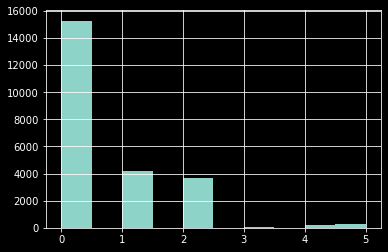

In [70]:
data['balcony'].hist()

Как видно, это действительно выбросы, таких значений мало и они портят общую картину. Но, удалять данные значения я не хочу, так как вся остальная информация во многих строках есть, для дальнейшего анализа влияния факторов на цену такой показатель, как балконы, не рассматривается.

#### Столбец locality_name

In [71]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5539
cityCenters_nearest      5516
parks_around3000         5515
parks_nearest           15611
ponds_around3000         5515
ponds_nearest           14580
days_exposition          3181
dtype: int64

In [72]:
data['locality_name'].value_counts()

Санкт-Петербург                    15708
посёлок Мурино                       521
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [73]:
data[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5,50.80,2,True,False,False,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,2.65,4,42.60,2,True,False,False,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.65,24,15.60,3,True,False,False,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.65,24,33.10,21,True,False,False,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.65,5,30.80,5,True,False,False,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8,39.62,7,True,False,False,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4,52.30,3,False,False,False,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,2.65,7,47.60,6,True,False,False,14.44,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,2.65,7,59.10,5,False,False,False,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,2.65,24,20.00,23,True,False,False,5.22,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Заменим пустые значения в строках на "Нет данных".

In [74]:
data['locality_name'] = data['locality_name'].fillna('Нет данных')

In [75]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [76]:
len(data['locality_name'].unique())

365

В столбце с названиями населенных пунктов наблюдается неявные дубликаты, например, "поселок Рябово" и "посёлок Рябово". Заменим все поселки на "посёлок".

In [77]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')

In [78]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет

In [79]:
len(data['locality_name'].unique())

331

Количество уменьшилось, значит, были и другие дубликаты после слово "поселок ...".

Замечен еще один неявный дубликат - "городской посёлок" и "посёлок городского типа". Это одно и тоже, заменим всё на "посёлок городского типа".

In [80]:
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')

In [81]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары',
       'посёлок городского типа Янино-1', 'посёлок Парголово',
       'посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёл

In [82]:
len(data['locality_name'].unique())

324

In [83]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары',
       'посёлок городского типа Янино-1', 'посёлок Парголово',
       'посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёл

In [84]:
words = pd.Series(data['locality_name'].unique())

In [85]:
words[words.str.contains('Мурино')]

4     посёлок Мурино
48            Мурино
dtype: object

Раньше было посёлком, теперь просто Мурино. Заменим.

In [86]:
words[words.str.contains('Кудрово')]

9     деревня Кудрово
55            Кудрово
dtype: object

Раньше называлась деревней, сейчас просто Кудрово. Заменим.

In [87]:
words[words.str.contains('Коммунар')]

10              Коммунар
247    посёлок Коммунары
dtype: object

Два разных названия, и на карте разные места.

In [88]:
words[words.str.contains('Веще')]

137                        посёлок станции Вещево
237    посёлок при железнодорожной станции Вещево
dtype: object

In [89]:
words[words.str.contains('Ряб')]

115                    посёлок Рябово
179    посёлок городского типа Рябово
dtype: object

In [90]:
words[words.str.contains('Приве')]

169                        посёлок станции Приветнинское
252    посёлок при железнодорожной станции Приветнинское
dtype: object

In [91]:
words[words.str.contains('Лесно')]

267               посёлок Лесное
320    коттеджный посёлок Лесное
dtype: object

In [92]:
# Код ревьюера
"Мурино".istitle()

True

In [93]:
word_list = ['посёлок Мурино', 'деревня Кудрово',\
             'посёлок Рябово' ,'посёлок станции Вещево','посёлок станции Приветнинское',\
             'коттеджный посёлок Лесное', 'посёлок станции',\
            'садоводческое некоммерческое товарищество']
name = ['Мурино', 'Кудрово', 'посёлок городского типа Рябово',\
        'посёлок при железнодорожной станции Вещево',\
        'посёлок при железнодорожной станции Приветнинское', 'посёлок Лесное', 'посёлок при железнодорожной станции',\
       'садовое товарищество']
 
for word in word_list:
    data['locality_name'] = data['locality_name'].replace(word_list, name, regex=True)  
 
#упорядоченный просмотр
list(data['locality_name'].sort_values(ascending=False).unique())   

['село Шум',
 'село Старая Ладога',
 'село Русско-Высоцкое',
 'село Рождествено',
 'село Путилово',
 'село Паша',
 'село Павлово',
 'село Никольское',
 'село Копорье',
 'садовое товарищество Садко',
 'садовое товарищество Рахья',
 'садовое товарищество Приладожский',
 'садовое товарищество Новая Ропша',
 'садовое товарищество Лесная Поляна',
 'посёлок при железнодорожной станции Свирь',
 'посёлок при железнодорожной станции Приветнинское',
 'посёлок при железнодорожной станции Лужайка',
 'посёлок при железнодорожной станции Корнево',
 'посёлок при железнодорожной станции Громово',
 'посёлок при железнодорожной станции Вещево',
 'посёлок городского типа имени Свердлова',
 'посёлок городского типа имени Морозова',
 'посёлок городского типа Янино-1',
 'посёлок городского типа Фёдоровское',
 'посёлок городского типа Форносово',
 'посёлок городского типа Ульяновка',
 'посёлок городского типа Токсово',
 'посёлок городского типа Тайцы',
 'посёлок городского типа Советский',
 'посёлок городско

In [94]:
len(data['locality_name'].unique())

318

In [95]:
data[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Столбец airports_nearest

In [96]:
data['airports_nearest'].value_counts()

37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
           ..
23418.0     1
30464.0     1
13760.0     1
23338.0     1
24665.0     1
Name: airports_nearest, Length: 8272, dtype: int64

In [97]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5539
cityCenters_nearest      5516
parks_around3000         5515
parks_nearest           15611
ponds_around3000         5515
ponds_nearest           14580
days_exposition          3181
dtype: int64

Пустых данных достаточно много, целых 23%. Это не заполнение человеком, данные взяты картографически. Возможно, это указывает на какие-то сбои в системе сбора данных. Удалять столько данных нельзя, но и среднее взять не получится - велика вероятность сильно исказить данные. Воспользуемся так называемой заглушкой - возьму число с одиннаковыми цифрами дальше максимума, чтобы подсветить и выделить пустые значения.

In [98]:
data['airports_nearest'].max()

84869.0

In [99]:
data['airports_nearest'] = data['airports_nearest'].fillna(99999.0) 

In [100]:
data[data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [101]:
data['airports_nearest'].value_counts()

99999.0    5539
37434.0      61
21928.0      32
39946.0      30
44870.0      30
           ... 
32366.0       1
13024.0       1
52394.0       1
20007.0       1
24665.0       1
Name: airports_nearest, Length: 8273, dtype: int64

In [102]:
sorted(data['airports_nearest'].unique())

[0.0,
 6450.0,
 6914.0,
 6949.0,
 6989.0,
 6992.0,
 6995.0,
 7002.0,
 7016.0,
 7019.0,
 7026.0,
 7050.0,
 7056.0,
 7083.0,
 7106.0,
 7114.0,
 7145.0,
 7201.0,
 7208.0,
 7233.0,
 7294.0,
 7316.0,
 7399.0,
 7433.0,
 7472.0,
 7493.0,
 7504.0,
 7637.0,
 7651.0,
 7659.0,
 7683.0,
 7711.0,
 7893.0,
 7900.0,
 7933.0,
 7934.0,
 7973.0,
 7994.0,
 8013.0,
 8099.0,
 8255.0,
 8340.0,
 8426.0,
 8502.0,
 8558.0,
 9112.0,
 9113.0,
 9143.0,
 9171.0,
 9172.0,
 9222.0,
 9226.0,
 9258.0,
 9273.0,
 9294.0,
 9310.0,
 9326.0,
 9354.0,
 9393.0,
 9412.0,
 9413.0,
 9417.0,
 9488.0,
 9504.0,
 9508.0,
 9513.0,
 9522.0,
 9527.0,
 9528.0,
 9548.0,
 9556.0,
 9563.0,
 9569.0,
 9586.0,
 9608.0,
 9619.0,
 9620.0,
 9655.0,
 9675.0,
 9687.0,
 9708.0,
 9717.0,
 9725.0,
 9731.0,
 9740.0,
 9758.0,
 9767.0,
 9774.0,
 9782.0,
 9801.0,
 9808.0,
 9811.0,
 9815.0,
 9822.0,
 9823.0,
 9837.0,
 9842.0,
 9843.0,
 9847.0,
 9855.0,
 9859.0,
 9863.0,
 9865.0,
 9869.0,
 9872.0,
 9875.0,
 9879.0,
 9898.0,
 9908.0,
 9914.0,
 9920.0,
 992

Аномалий выявить не удастся.

#### Столбец cityCenters_nearest

In [103]:
data['cityCenters_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
8434.0     27
8370.0     26
           ..
1507.0      1
1806.0      1
15782.0     1
25620.0     1
6263.0      1
Name: cityCenters_nearest, Length: 7639, dtype: int64

C этим столбцом поступлю также, как в предыдущем пункте - заглушка больше максимума.

In [104]:
data['cityCenters_nearest'].max()

65968.0

In [105]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(88888.0) 

In [106]:
data[data['cityCenters_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [107]:
sorted(data['cityCenters_nearest'].unique())

[181.0,
 208.0,
 215.0,
 287.0,
 291.0,
 318.0,
 329.0,
 376.0,
 387.0,
 392.0,
 399.0,
 410.0,
 423.0,
 436.0,
 467.0,
 472.0,
 515.0,
 537.0,
 552.0,
 555.0,
 573.0,
 583.0,
 591.0,
 594.0,
 602.0,
 621.0,
 623.0,
 639.0,
 649.0,
 650.0,
 653.0,
 658.0,
 671.0,
 672.0,
 675.0,
 686.0,
 700.0,
 729.0,
 730.0,
 743.0,
 752.0,
 769.0,
 772.0,
 801.0,
 814.0,
 820.0,
 830.0,
 833.0,
 835.0,
 853.0,
 867.0,
 869.0,
 904.0,
 911.0,
 933.0,
 936.0,
 945.0,
 959.0,
 964.0,
 993.0,
 996.0,
 1015.0,
 1032.0,
 1043.0,
 1053.0,
 1073.0,
 1075.0,
 1085.0,
 1090.0,
 1096.0,
 1097.0,
 1111.0,
 1113.0,
 1117.0,
 1122.0,
 1124.0,
 1139.0,
 1141.0,
 1146.0,
 1152.0,
 1155.0,
 1158.0,
 1162.0,
 1163.0,
 1166.0,
 1178.0,
 1179.0,
 1181.0,
 1190.0,
 1195.0,
 1197.0,
 1200.0,
 1205.0,
 1211.0,
 1214.0,
 1216.0,
 1217.0,
 1218.0,
 1223.0,
 1225.0,
 1226.0,
 1229.0,
 1230.0,
 1233.0,
 1238.0,
 1240.0,
 1242.0,
 1248.0,
 1249.0,
 1250.0,
 1253.0,
 1255.0,
 1257.0,
 1261.0,
 1269.0,
 1272.0,
 1276.0,
 1280.0,

Каких-то аномалий здесь выявить не представляется возможным.

#### Столбцы parks_around3000 и ponds_around3000 

In [108]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000         5515
parks_nearest           15611
ponds_around3000         5515
ponds_nearest           14580
days_exposition          3181
dtype: int64

Мною было замечено, что количество пустых строк с количеством парком равно количеству пустых значений с количеством прудов. Проверим эту гипотезу.

In [109]:
data_pond = data[(data['parks_around3000'].isna()) & (data['ponds_around3000'].isna())]

In [110]:
data_pond

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,True,False,False,9.10,0,посёлок городского типа Янино-1,99999.0,88888.0,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,True,False,False,8.81,0,Мурино,99999.0,88888.0,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5,30.00,5,True,False,False,9.00,0,Сертолово,99999.0,88888.0,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25,30.00,15,True,False,False,11.00,2,Кудрово,99999.0,88888.0,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9,18.81,2,True,False,False,5.71,0,Коммунар,99999.0,88888.0,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5,45.50,3,True,False,False,5.50,0,посёлок Дзержинского,99999.0,88888.0,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5,17.50,4,True,False,False,6.00,0,Тихвин,99999.0,88888.0,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5,38.00,4,True,False,False,8.50,0,Тосно,99999.0,88888.0,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3,29.70,1,True,False,False,9.87,0,село Рождествено,99999.0,88888.0,NaN,NaN,NaN,NaN,NaN


In [111]:
((data['parks_around3000'].isna()) & (data['ponds_around3000'].isna())).all()

False

Гипотеза подтвердилась - количество совместных пустых значений равно количеству выведенных строк.

In [112]:
data['parks_around3000'].value_counts()

0.0    10100
1.0     5675
2.0     1744
3.0      647
Name: parks_around3000, dtype: int64

In [113]:
data['ponds_around3000'].value_counts()

0.0    9065
1.0    5714
2.0    1890
3.0    1497
Name: ponds_around3000, dtype: int64

Проверим, можно ли заменить средним значением по населенным пунктам.

In [114]:
data[data['locality_name'] == 'Гатчина']['ponds_around3000'].sum()

0.0

In [115]:
data[data['locality_name'] == 'Тихвин']['ponds_around3000'].sum()

0.0

Как видно по двух проверенным значениям, скорее всего, на одинаковых населенных пунктах ситуация одинаково - не указаны количества прудов и парков.

Заменим все пустые значения нулями.

In [116]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [117]:
data['parks_around3000'].value_counts()

0.0    15615
1.0     5675
2.0     1744
3.0      647
Name: parks_around3000, dtype: int64

In [118]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [119]:
data['ponds_around3000'].value_counts()

0.0    14580
1.0     5714
2.0     1890
3.0     1497
Name: ponds_around3000, dtype: int64

Каких-то аномальных значений не наблюдается - в радиусе 3-х километров может быть по 3 пруда и парка.

Данные по количеству можно заменить на int.

In [120]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [121]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

#### Столбец parks_nearest и ponds_nearest

In [122]:
data['parks_nearest'].value_counts()

441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
          ..
1120.0     1
2847.0     1
887.0      1
1809.0     1
2984.0     1
Name: parks_nearest, Length: 994, dtype: int64

In [123]:
data['ponds_nearest'].value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
474.0     37
          ..
1020.0     1
1313.0     1
1025.0     1
742.0      1
1134.0     1
Name: ponds_nearest, Length: 1096, dtype: int64

In [124]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest           15611
ponds_around3000            0
ponds_nearest           14580
days_exposition          3181
dtype: int64

In [125]:
data['parks_around3000'].value_counts()

0    15615
1     5675
2     1744
3      647
Name: parks_around3000, dtype: int64

In [126]:
data['ponds_around3000'].value_counts()

0    14580
1     5714
2     1890
3     1497
Name: ponds_around3000, dtype: int64

Можно заметить, что в обоих случаях количество пустых значений по расстояниям до парка и пруда практически равно (а по прудам ровно столько же), количеству значений парков и прудов, равное 0. Нет парка и пруда - нет расстояния. 

In [127]:
data['parks_nearest'].max()

3190.0

In [128]:
data['ponds_nearest'].max()

1344.0

Хоть количество значений и равно количеству отсутствующих парков и прудов, если мы заменим такое количество на 0, это очень сильно исказит график. Попробуем также поставить заглушку, чтобы подстветить отсутствие данных.

In [129]:
data['parks_nearest'] = data['parks_nearest'].fillna(4444.0)

In [130]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(2222.0)

#### Столбец days_exposition

In [131]:
data['days_exposition'].value_counts()

45.0      879
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [132]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

In [133]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,4444.0,0,2222.0,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,91.18,9,True,False,False,27.66,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.30,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5,38.00,4,True,False,False,8.50,0,Тосно,99999.0,88888.0,0,4444.0,0,2222.0,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3,29.70,1,True,False,False,9.87,0,село Рождествено,99999.0,88888.0,0,4444.0,0,2222.0,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,44.01,12,True,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


Отсутствие данных в этом столбце может говорить о том, что объявление еще висит. Воспользуемся также маркером заглушкой для устранения пропусков, но не удаления их, а для 'подсветки'.

In [134]:
data['days_exposition'].max()

1580.0

In [135]:
data['days_exposition'] = data['days_exposition'].fillna(2222)

#### Другие столбцы

Проверим столбец с количеством комнат на аномалии.

In [136]:
data['rooms'].value_counts()

1     8040
2     7934
3     5812
4     1179
5      326
0      195
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Скорее всего всё, что больше 8-ми комнат - является аномальным значением. Удалим их. 

In [137]:
data = data[~(data['rooms'] > 8)].copy()

Проверим также цены:

In [138]:
list(data['last_price'].sort_values(ascending=False).unique())   

[763000000.0,
 401300000.0,
 330000000.0,
 300000000.0,
 289238400.0,
 245000000.0,
 240000000.0,
 230000000.0,
 190870000.0,
 180000000.0,
 160000000.0,
 159984000.0,
 159000000.0,
 155000000.0,
 150000000.0,
 148000000.0,
 140000000.0,
 135000000.0,
 131000000.0,
 130278280.0,
 130000000.0,
 125000000.0,
 124480000.0,
 124350000.0,
 124000000.0,
 122000000.0,
 120000000.0,
 119000000.0,
 118000000.0,
 115490000.0,
 99000000.0,
 98000000.0,
 96000000.0,
 95000000.0,
 91500000.0,
 91075000.0,
 90000000.0,
 87000000.0,
 86738800.0,
 85000000.0,
 84382000.0,
 84000000.0,
 83820000.0,
 83000000.0,
 82400000.0,
 82000000.0,
 81960000.0,
 80000000.0,
 79339000.0,
 79000000.0,
 77612080.0,
 77349000.0,
 77000000.0,
 76837000.0,
 75000000.0,
 74000000.0,
 73900000.0,
 73884056.0,
 72375000.0,
 72000000.0,
 71000000.0,
 68500000.0,
 68000000.0,
 67000000.0,
 66571000.0,
 66500000.0,
 65850000.0,
 65138176.0,
 65000000.0,
 64900000.0,
 64500000.0,
 63900000.0,
 62316000.0,
 62171920.0,
 6099900

Посмотрим строки, где стоимость меньше 500000.

In [139]:
data[data['last_price'] < 500000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,2.65,1,23.00,1,True,False,False,5.80,0,посёлок городского типа Будогощь,99999.0,88888.0,0,4444.0,0,2222.0,233.0
6859,6,490000.0,40.0,2017-12-11T00:00:00,1,2.65,5,22.94,3,True,False,False,6.96,0,деревня Старополье,99999.0,88888.0,0,4444.0,0,2222.0,43.0
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.00,25,True,False,False,40.50,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,2222.0,8.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,2.65,5,30.30,3,True,False,False,5.50,0,деревня Старополье,99999.0,88888.0,0,4444.0,0,2222.0,96.0
10782,3,490000.0,29.1,2016-05-05T00:00:00,1,2.50,5,17.00,5,True,False,False,5.50,0,Сланцы,99999.0,88888.0,0,4444.0,0,2222.0,719.0
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,2.65,3,30.97,3,True,False,False,9.40,0,посёлок при железнодорожной станции Свирь,99999.0,88888.0,0,4444.0,0,2222.0,44.0
16032,8,480000.0,32.0,2019-01-06T00:00:00,1,2.65,2,16.00,1,True,False,False,5.57,0,Сланцы,99999.0,88888.0,0,4444.0,0,2222.0,83.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2,22.08,1,True,False,False,6.70,0,деревня Вахнова Кара,99999.0,88888.0,0,4444.0,0,2222.0,45.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,2.65,5,22.94,1,True,False,False,6.96,0,деревня Старополье,99999.0,88888.0,0,4444.0,0,2222.0,45.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,2.65,2,16.00,1,True,False,False,6.00,0,Сланцы,99999.0,88888.0,0,4444.0,0,2222.0,2222.0


Возможно, такая стоимость может быть в деревнях. Удалять как аномалию не будем. Но бросилась в глаза строка с ценой 12190. Выделим ее

In [140]:
data[data['last_price'] < 400000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,True,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,2222.0,8.0


Совсем что-то не так - квартира площадью 109 м2 не может стоить 12190 рублей. Возможно, ошиблись с вводом нулей. В любом случае, строка всего одна, додумывать не будем. Удалим как аномалию,чтобы не искажать дальнейшие данные

In [141]:
data = data[~(data['last_price'] < 400000)].copy()

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра:

In [142]:
data['price_per'] = round(data['last_price'] / data['total_area'], 2).copy()

In [143]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,2222.0,120370.37
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,4444.0,0,2222.0,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,91.18,9,True,False,False,27.66,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,True,False,False,9.10,0,посёлок городского типа Янино-1,99999.0,88888.0,0,4444.0,0,2222.0,55.0,95065.79
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26,10.60,6,True,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,4444.0,0,2222.0,155.0,99195.71
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24,41.06,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,4444.0,0,2222.0,2222.0,110544.69
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,True,False,False,8.81,0,Мурино,99999.0,88888.0,0,4444.0,0,2222.0,189.0,87454.76
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,4444.0,0,2222.0,289.0,88524.59


День недели(понедельник - 0, вторник - 1 и т.д), месяц, год:

In [144]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [145]:
data['day_week'] = data['first_day_exposition'].dt.weekday.copy()

In [146]:
data['month'] = data['first_day_exposition'].dt.month.copy()

In [147]:
data['year'] = data['first_day_exposition'].dt.year.copy()

Другой способ(для себя):

In [148]:
#data['day_week'] = pd.DatetimeIndex(data['first_day_exposition']).weekday.copy()

In [149]:
#data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month.copy()

In [150]:
#data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year.copy()

In [151]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per,day_week,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,2222.0,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,4444.0,0,2222.0,81.0,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,91.18,9,True,False,False,27.66,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,0,посёлок городского типа Янино-1,99999.0,88888.0,0,4444.0,0,2222.0,55.0,95065.79,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,4444.0,0,2222.0,155.0,99195.71,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,41.06,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,4444.0,0,2222.0,2222.0,110544.69,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,0,Мурино,99999.0,88888.0,0,4444.0,0,2222.0,189.0,87454.76,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,4444.0,0,2222.0,289.0,88524.59,6,2,2017


Тип этажа - первый, последний и другой:

In [152]:
def floor_category(data):
    floor_fl = data['floor']
    floors = data['floors_total']
    if floor_fl == 1:
        return 'первый'
    if floors == floor_fl:
        return 'последний'
    else:
        return 'другой'    

In [153]:
data['fl_category'] = data.apply(floor_category, axis = 1).copy()

In [154]:
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per,day_week,month,year,fl_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,2222.0,120370.37,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,4444.0,0,2222.0,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,91.18,9,True,False,False,27.66,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,0,посёлок городского типа Янино-1,99999.0,88888.0,0,4444.0,0,2222.0,55.0,95065.79,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,4444.0,0,2222.0,155.0,99195.71,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,41.06,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,4444.0,0,2222.0,2222.0,110544.69,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,0,Мурино,99999.0,88888.0,0,4444.0,0,2222.0,189.0,87454.76,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,4444.0,0,2222.0,289.0,88524.59,6,2,2017,другой


Расстояние до центра города в километрах:

In [155]:
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000

In [156]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')

Также сделаем удобнее расстояние до аэропортов:

In [157]:
data['airports_nearest'] = data['airports_nearest'] / 1000

In [158]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per,day_week,month,year,fl_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18.863,16,1,482.0,2,755.0,2222.0,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,12.817,18,0,4444.0,0,2222.0,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21.741,13,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,91.18,9,True,False,False,27.66,0,Санкт-Петербург,28.098,6,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31.856,8,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой


Сделаем удобным прочтение цены:

In [159]:
data['last_price'] = (data['last_price'] / 1000).copy()

In [160]:
# код ревьюера

pd.DataFrame({'col_1' : [100000,100000000]}).style.format('{:,}',subset='col_1')

,col_1
0,"100,000"
1,"100,000,000"


In [161]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per,day_week,month,year,fl_category
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18.863,16,1,482.0,2,755.0,2222.0,120370.37,3,3,2019,другой
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,12.817,18,0,4444.0,0,2222.0,81.0,82920.79,1,12,2018,первый
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21.741,13,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900.0,159.0,2015-07-24,3,2.65,14,91.18,9,True,False,False,27.66,0,Санкт-Петербург,28.098,6,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31.856,8,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой


### Проведите исследовательский анализ данных

#### Исследуем параметры:

**1) общая площадь - total_area**

<AxesSubplot:>

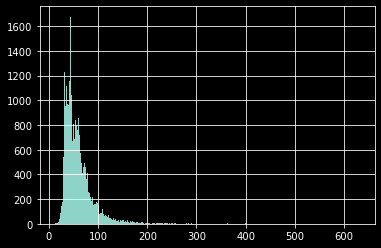

In [162]:
data['total_area'].hist(bins = 300)

По данной гистограмме можно сказать, что квартиры с площадью более 200 м2 - редкое явление. Проверим ограничением диапазона. Возьмем range = (0, 250).

<AxesSubplot:>

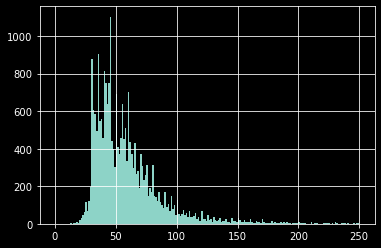

In [163]:
data['total_area'].hist(bins = 200, range = (0, 250))

Гипотеза подтвердилась, квартир с площадью 100 и больше гораздо меньше, здесь даже видно, что не после 200, а даже после 150 - значений очень и очень мало.

<AxesSubplot:>

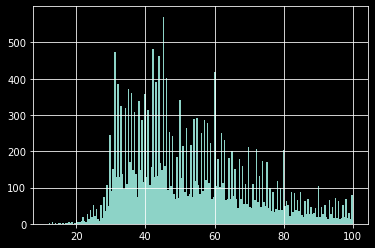

In [164]:
data['total_area'].hist(bins = 200, range = (12, 100))

In [165]:
data['total_area'].describe()

count    23661.000000
mean        60.134655
std         34.515770
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64

Средняя площадь квартир - 60 м2. Медиана при этом практически рядом - 52 м2. Разброс квартир в меньшую и большую сторону - площади квартир от 25 м2 до 95 м2. Это хорошо видно на графике: он начинает 'подъем' примерно в показателе 25 м2, и затухает где-то в 95 м2. Минимальное и максимальное значения в 12 м2 и 900 м2 соответственно указывает на большой разброс в площади квартир.

**2) жилая площадь - living_area;**

<AxesSubplot:>

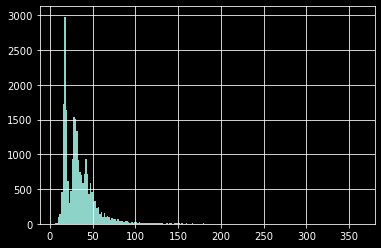

In [166]:
data['living_area'].hist(bins = 200)

По данному графику можно сказать, что квартир с жилой площадью больше 100 м2 почти нет, а больше 200 м2 и вовсе не видно на графике, это единичные случаи. Поставим диапазон range = (0, 200)

<AxesSubplot:>

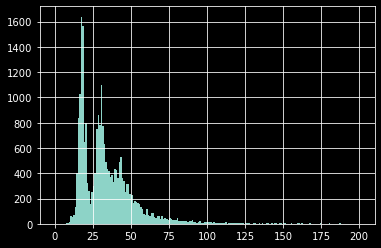

In [167]:
data['living_area'].hist(bins = 200, range = (0, 200))

На данном графике, что уже после показателя 75 м2 происходит затухание. Установим range = (0, 100)

<AxesSubplot:>

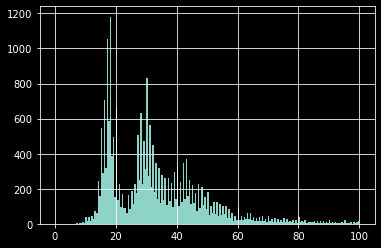

In [168]:
data['living_area'].hist(bins = 200, range = (0, 100))

In [169]:
data['living_area'].describe()

count    23661.000000
mean        34.484022
std         21.736078
min          6.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        361.860000
Name: living_area, dtype: float64

Среднее значение жилой площади - 34 м2. Недалеко ушла и медиана - 30 м2. Среднеквадратичное отклонение указывает на диапазон в площади от 12 м2 до 56 м2 жилой площади. Также, диапазон всех значений достаточно большой - от 6 м2 до 409 м2. 

**3) площадь кухни - kitchen_area;**

<AxesSubplot:>

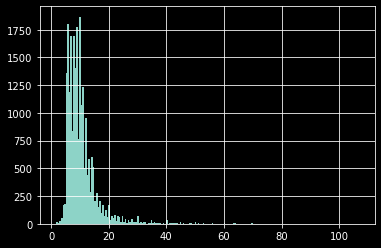

In [170]:
data['kitchen_area'].hist(bins = 200)

По графику площади кухни можно сказать, что кухонь с площадью 20 м2 очень мало, а после 40 и вовсе нет. Ограничим график до 40 м2.

<AxesSubplot:>

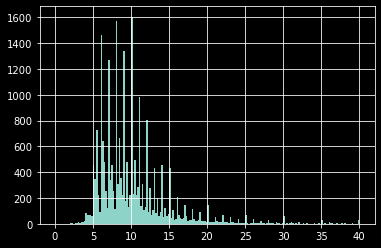

In [171]:
data['kitchen_area'].hist(bins = 200, range = (0, 40))

Всё таки при этом графике хочется еще урезать данные, возьмем range = (0, 20)

<AxesSubplot:>

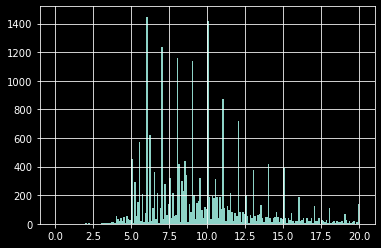

In [172]:
data['kitchen_area'].hist(bins = 200, range = (0, 20))

In [173]:
data['kitchen_area'].describe()

count    23661.000000
mean        10.482841
std          5.953823
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Средняя площадь кухни - 10 м2. Медиана почти такая же - 9 м2. Отклонение от средней указывает на диапазон размеров от примерно 5 м2 до 16 м2. Общий диапазон также достаточно обширен - есть кухни 1.3 м2 и 107 м2.

**4) цена объекта - last_price;**

<AxesSubplot:>

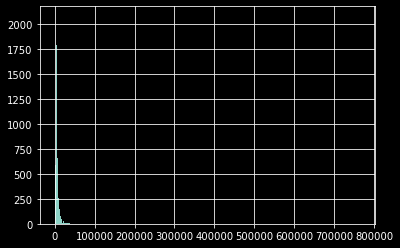

In [174]:
data['last_price'].hist(bins = 2000)

Можно сказать, что есть какие-то аномально высокие цены, которых даже практически не видно на графике. График собран в левой части, поэтому чтобы увидеть его подробнее, ограничим range = (0, 100000)

<AxesSubplot:>

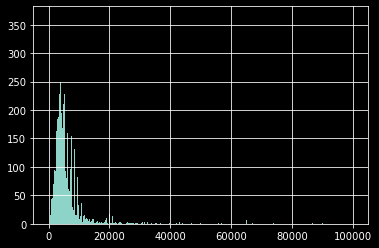

In [175]:
data['last_price'].hist(bins = 2000, range = (0, 100000))

График стал более читаем, но здесь также наблюдаются редкие значения. График стоимости начал затухать примерно после 10000, а после 20000 появляются редкие, практически единичные, значения. Ограничим график range = (0, 20000)

<AxesSubplot:>

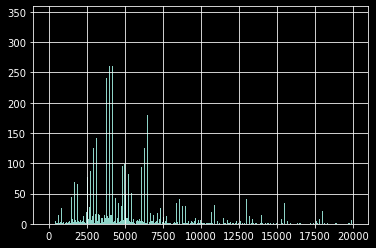

In [176]:
data['last_price'].hist(bins = 2000, range = (0, 20000))

In [177]:
data['last_price'].describe()

count     23661.000000
mean       6503.375016
std       10515.863844
min         430.000000
25%        3400.000000
50%        4650.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

Средняя стоимость квартир - 6.5 млн рублей. Медиана указывает на 4.6 млн рублей. По квартилям и по графику можно сказать, что диапазон цен в среднем от 3.4 млн рублей до 6.7 млн рублей. Общий разброс цен на квартиры от 430 тыс рублей до 763 млрд рублей.

**5) количество комнат - rooms;**

<AxesSubplot:>

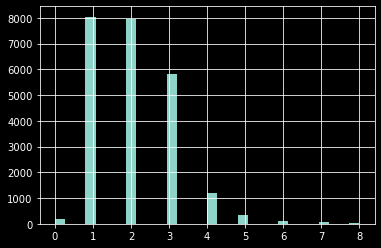

In [178]:
data['rooms'].hist(bins = 30)

По графику видно, что студий без комнат очень мало и квартир с 6-тьюи более комнатами крайне мало. Уменьшим диапазон до 5.

<AxesSubplot:>

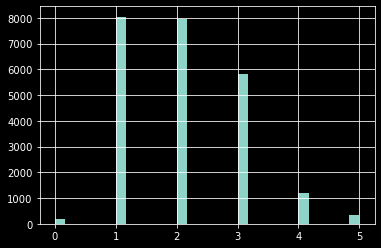

In [179]:
data['rooms'].hist(bins = 30, range = (0, 5))

In [180]:
data['rooms'].describe()

count    23661.000000
mean         2.063607
std          1.043704
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

В среднем комнат от 1 до 3. И медиана, и среднее, и график на это указывают. Также в общем объеме данных комнат может как и не быть ( в студиях), так и быть в количестве 8 комнат

**6) высота потолков - ceiling_height;**

<AxesSubplot:>

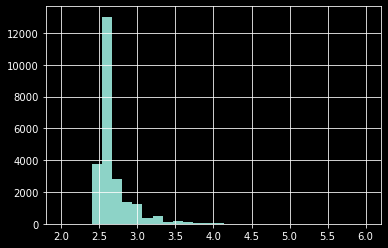

In [181]:
data['ceiling_height'].hist(bins = 30)

По графику можно сказать, что значение высоты потолков 3 м уже гораздо реже, а после 3.5 вовсе почти исчезает. Как и нет очень низких потолков. Уменьшим range до 3.5, а слева до 2.2.

<AxesSubplot:>

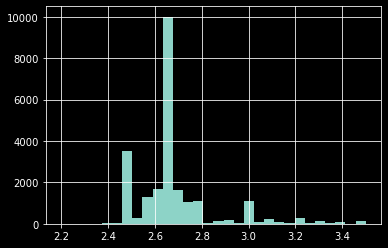

In [182]:
data['ceiling_height'].hist(bins = 30, range = (2.2, 3.5))

Стало понятно, что квартир с потолками меньше 2.4 м почти нет, а и потолков больше 3 м. Изменим range.

<AxesSubplot:>

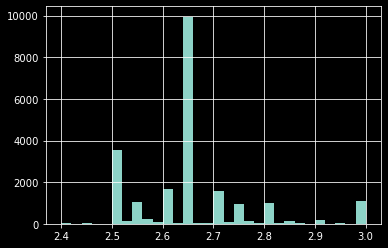

In [183]:
data['ceiling_height'].hist(bins = 30, range = (2.4, 3.0))

In [184]:
data['ceiling_height'].describe()

count    23661.000000
mean         2.696556
std          0.220854
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

Средняя высота потолков - 2.69 метра. Рядом расположилась и медиана - 2.65 м. На это также указывает и график. В среднем потолки в диапазоне от 2.4 м до 2.9 м. В общих данных есть потолки и 2 м, и 6 м.  

**7) этаж квартиры - floor;**

<AxesSubplot:>

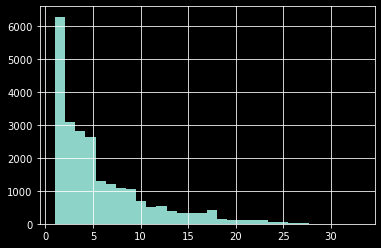

In [185]:
data['floor'].hist(bins = 30)

Данный график указывает, что столбец floor описывается согласно распределения Пуассона. Можно сказать о том, что продаваемые квартиры находились на 1 этаже, что такие квартиры чаще всего выставляются на продажу.

In [186]:
data['floor'].describe()

count    23661.000000
mean         5.891129
std          4.881857
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

И описание данных на это указывает: средний этаж 4, медиана такая же. Среднеквадратичное отклонение указывает на разброс в этажах с 1 по 9. 

**8) тип этажа - fl_сategory;**

<AxesSubplot:>

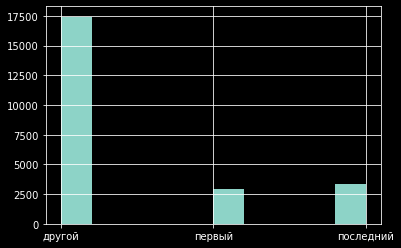

In [187]:
data['fl_category'].hist()

По типам этажей - 17500 обьявлений относится к категории этажа 'Другой', остальные почти поровну категории 'первый' и 'последний'

**9) общее количество этажей - floors_total;**

<AxesSubplot:>

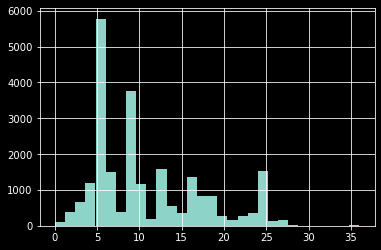

In [188]:
data['floors_total'].hist(bins = 30)

По графику можно сказать, что квартир с указанной общей этажностью больше 25 гораздо меньше, а больше 30 и вовсе не видно. Ограничим до 25 этажей.

<AxesSubplot:>

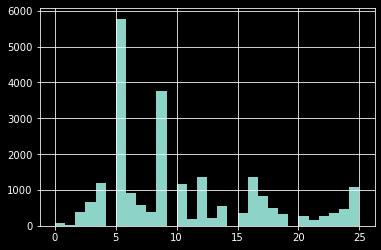

In [189]:
data['floors_total'].hist(bins = 30, range = (0, 25))

In [190]:
data['floors_total'].describe()

count    23661.000000
mean        10.632349
std          6.600657
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

Средняя этажность домов - 10 этажей. Медиана говорит о 9 этажности, что, скорее всего, более правильно, так как дома 'девятиэтажки' распространены. Среднеквадратичное отклонение говорит о диапазоне этажности от 4 до 16 этажей. Максимально встречаются и 36 этажности дома

**10) расстояние до центра города - cityCenters_nearest;**

<AxesSubplot:>

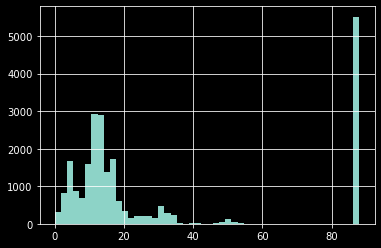

In [191]:
data['cityCenters_nearest'].hist(bins = 50)

Здесь можем наблюдать поставленный маркер, который показывает насколько много пустых строк. Сам график расположился вначале, по нему видно, что расстояние до центра более 40 км практически отсутствует. Уменьшим диапазон до 40.

<AxesSubplot:>

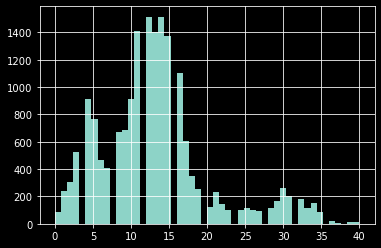

In [192]:
data['cityCenters_nearest'].hist(bins = 50, range = (0, 40))

Проверим,влияет ли маркер на описание данных.

In [193]:
data['cityCenters_nearest'].describe()

count    23661.000000
mean        31.022949
std         32.307439
min          0.000000
25%         10.000000
50%         15.000000
75%         35.000000
max         88.000000
Name: cityCenters_nearest, dtype: float64

In [194]:
data[~(data['cityCenters_nearest'] == 88)]['cityCenters_nearest'].describe()

count    18145.000000
mean        13.702177
std          8.609481
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         65.000000
Name: cityCenters_nearest, dtype: float64

Маркер повлиял, ориентируемся на данные без него. Среднее расстояние до центра - 13 км. Медиана такая же. Среднеквадратичное отклонение указывает на то, что квартиры из объявлений в основном в диапазоне от 5 км до 21 км от центра города.

**11) расстояние до ближайшего аэропорта - airports_nearest;**

<AxesSubplot:>

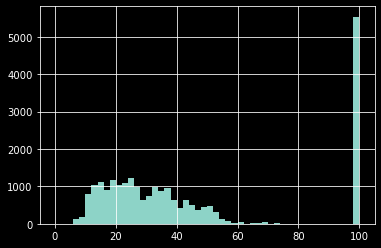

In [195]:
data['airports_nearest'].hist(bins = 50)

Также здесь наблюдаем маркер заглушку с пустыми значениями - их много. Основной график располагается левее. По нему можно сказать, что значения в 60 км крайне редки. Сделаем срез по ним.

<AxesSubplot:>

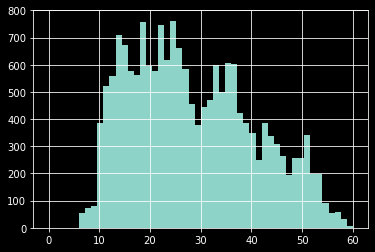

In [196]:
data['airports_nearest'].hist(bins = 50, range = (0, 60))

In [197]:
data['airports_nearest'].describe()

count    23661.000000
mean        45.467487
std         32.112035
min          0.000000
25%         21.190000
50%         33.564000
75%         54.273000
max         99.999000
Name: airports_nearest, dtype: float64

In [198]:
data[~(data['airports_nearest'] == 99.999)]['airports_nearest'].describe()

count    18122.000000
mean        28.799898
std         12.633248
min          0.000000
25%         18.582000
50%         26.737000
75%         37.288000
max         84.869000
Name: airports_nearest, dtype: float64

Маркер поменял картину с данными. Ориентируемся на описание без него. Среднее расстояние до ближайшего аэропорта - 28 км. Медиана при этом - 26 км. По среднеквадратичному отклонению можно сказать, что квартиры из объявлений находятся в диапазоне расстоний от ближайшего аэропорта от 16 км до 40 км. Это видно и на графике.

**12) расстояние до ближайшего парка - parks_nearest;**

<AxesSubplot:>

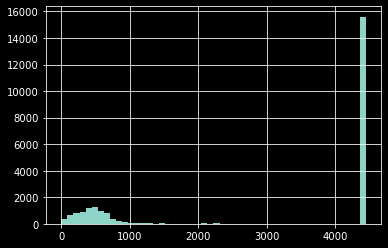

In [199]:
data['parks_nearest'].hist(bins = 50)

Опять же убираем маркер заглушку. Пока видно, что все данные практически исчезают в значении 1000 и редко проявляются в значении 2000. Поставим range до 2000.

<AxesSubplot:>

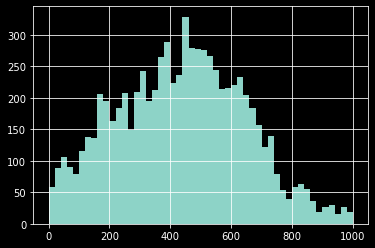

In [200]:
data['parks_nearest'].hist(bins = 50, range = (0, 1000))

In [201]:
data['parks_nearest'].describe()

count    23661.000000
mean      3098.392629
std       1883.825305
min          1.000000
25%        601.000000
50%       4444.000000
75%       4444.000000
max       4444.000000
Name: parks_nearest, dtype: float64

In [202]:
data[~(data['parks_nearest'] == 4444)]['parks_nearest'].describe()

count    8054.000000
mean      490.881550
std       342.656916
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Маркер повлиял, ориентируемся на данные без него. Среднее расстояние до парка в объявлениях - 490 м. Медиана при этом - 450 м. Среднеквадратичное отклонение указывает на диапазон в 148 м и 832 м. На графике это также видно. Общий диапазон от 1 м до 3190 м до парка. 

**13) день и месяц публикации объявления - day_week и month;**

<AxesSubplot:>

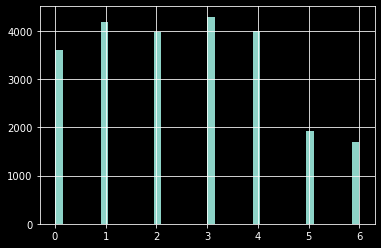

In [203]:
data['day_week'].hist(bins = 40)

Меньше всего объявлений выставляется в субботу и воскресенье. Это может быть обусловлено тем, что объявления выставляются агентами по недвижимости в рабочие дни.

<AxesSubplot:>

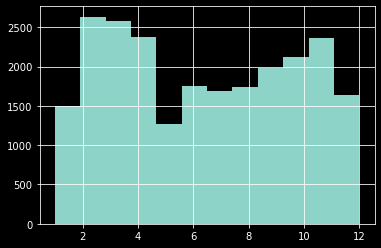

In [204]:
data['month'].hist(bins = 12)

На графике видны некие угасания количества в начале года, в середине примерно в мае, и в конце года. Предположу, что это обусловлено праздничными днями,что также возможно указывает на работу агентов по недвижимости.

<AxesSubplot:>

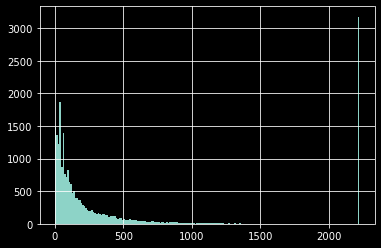

In [205]:
data['days_exposition'].hist(bins = 200)

Маркер снова подсветил данные, которых нет. Рассмотрим основной график. Данные начинают затухать в районе 500 дней. Установим range.

<AxesSubplot:>

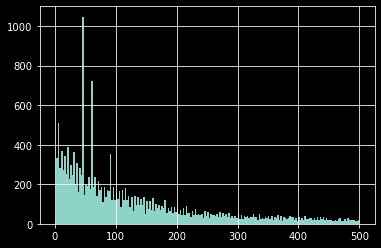

In [206]:
data['days_exposition'].hist(bins = 200, range = (0, 500))

In [207]:
data['days_exposition'].describe()

count    23661.000000
mean       454.697477
std        725.143622
min          1.000000
25%         45.000000
50%        124.000000
75%        389.000000
max       2222.000000
Name: days_exposition, dtype: float64

In [208]:
data[~(data['days_exposition'] == 2222)]['days_exposition'].describe()

count    20486.000000
mean       180.794054
std        219.573109
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продаются за 180 дней, где-то за полгода. Медиана при этом гораздо меньше - 95 дней. И график говорит о том, что примерный срок продажи до 100 дней. По среднеквадратичному отклонению диапазон до 400 дней. По квартилям это от 45 дней до 232 дней, что ближе к графику.

#### Факторы, влияющие на цену. Зависимость цены от них

**1) Общая площадь**

<AxesSubplot:xlabel='total_area'>

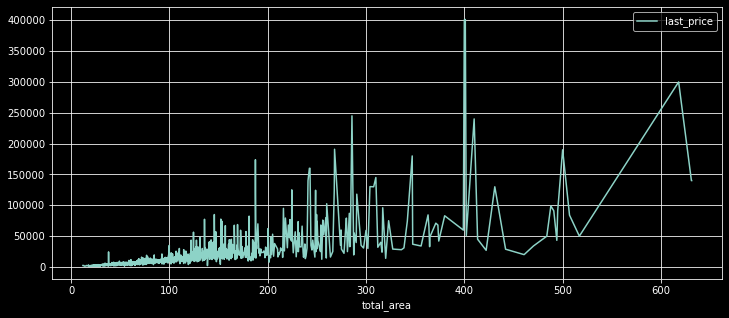

In [209]:
data.pivot_table(index = 'total_area', values = 'last_price').plot(grid = True, figsize = (12, 5))

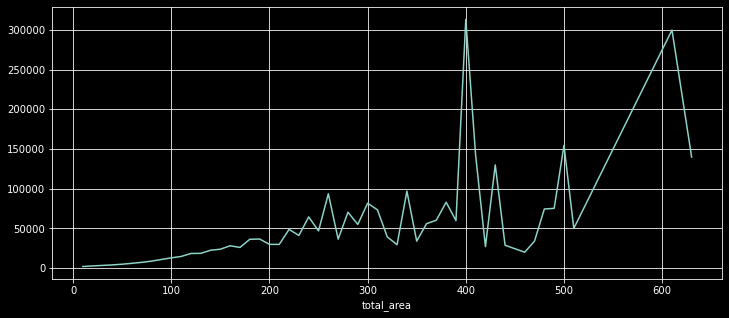

In [210]:
# код ревьбюера

data.groupby(data['total_area'] // 10 * 10)['last_price'].agg('mean').plot(grid = True, figsize = (12, 5));

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

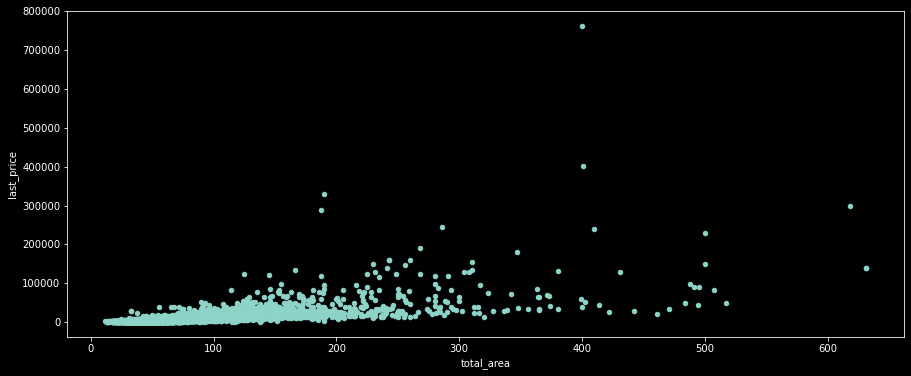

In [211]:
# код ревьюера

data.plot(kind='scatter', x='total_area', y='last_price', figsize=(15,6))

In [212]:
data['total_area'].corr(data['last_price'])

0.6435881925615364

Корреляция в 0.64 говорит о наличие связи, однако не сильно большой. И всё же, можно сделать вывод о том, что тем больше площадь, тем больше цена.

**2) Жилая площадь**

<AxesSubplot:xlabel='living_area'>

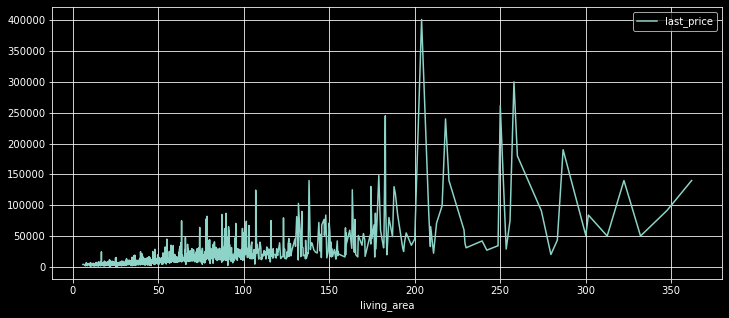

In [213]:
data.pivot_table(index = 'living_area', values = 'last_price').plot(grid = True, figsize = (12, 5))

In [214]:
data['living_area'].corr(data['last_price'])

0.5806969159126925

Связь между данными факторами жилой площади и цены почти такие же, как общей площади, но меньше - 0.58. Это обусловлено тем, что жилая площадь является частью целой площади, но также показана взаимосвязь чем больше жилая площадь, тем больше (полная) цена.

**3) Площадь кухни**

<AxesSubplot:xlabel='kitchen_area'>

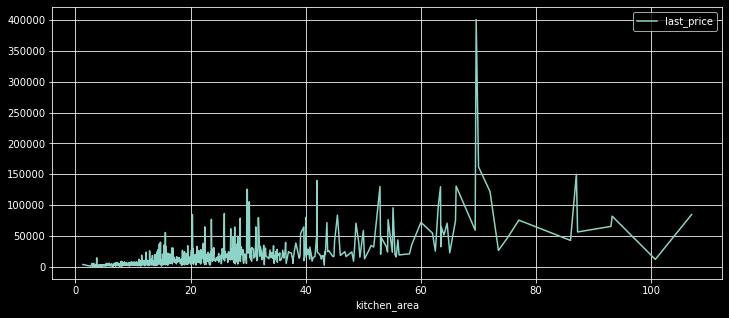

In [215]:
data.pivot_table(index = 'kitchen_area', values = 'last_price').plot(grid = True, figsize = (12, 5))

In [216]:
data['kitchen_area'].corr(data['last_price'])

0.5031221136353377

Связь между площадью кухни и ценой еще меньше, чем предыдущих факторов - 0.5. Это неудивительно, в масштабах квартиры кухня имеет меньший процент от всей площади, сравнивая жилую, например. Также кухни бывают абсолютно разных размеров, а в студии и вовсе ее нет или указан минимальный размер погонного метра, например. Здесь также справедлива взаимосвязь: чем больше кухня, тем больше цена. Но опять же, это зависило от общей площади квартиры.

**4) Количество комнат**

<AxesSubplot:xlabel='rooms'>

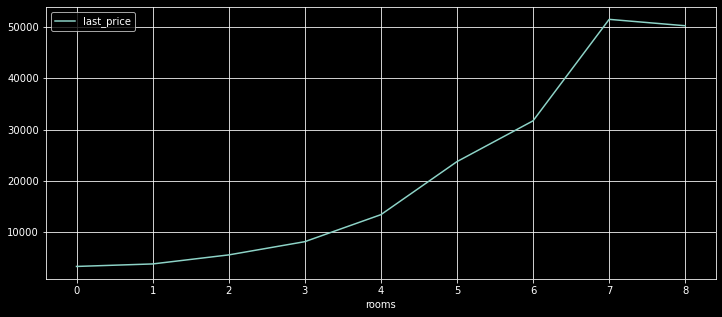

In [217]:
data.pivot_table(index = 'rooms', values = 'last_price').plot(grid = True, figsize = (12, 5))

In [218]:
data['rooms'].corr(data['last_price'])

0.3565606544635336

Положительную, но совсем небольшую, взаимосвязь имеют факторы количество комнат и цена - 0.35. Можно сказать о том, что чем больше комнат в доме, тем выше цена.

**5) Тип этажа**

<AxesSubplot:xlabel='fl_category'>

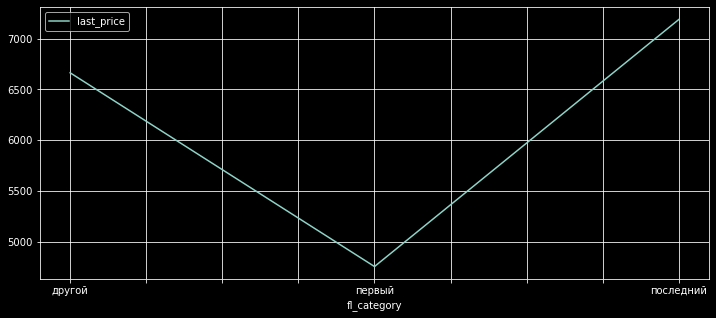

In [219]:
data.pivot_table(index = 'fl_category', values = 'last_price').plot(grid = True, figsize = (12, 5))

По графику можно сказать, что первый этаж в большинстве своем имеет проседание в цене. По многим факторам люди не рассматривают первые этажи: окна на небезопасной высоте, нужно ставить решетки, чего не хочется делать; на первом этаже бывают проблемы с отоплением - обычно там холодно; возможные затопления и проблемы с канализацией со всех верхних этажей. Чтобы продать такую квартиру, человеку нужно ставить цену ниже рынка аналогичных квартир в доме. 
С другой стороны квартиры на последнем этаже немного дороже, чем по типу 'другой' этаж. Хотя в нем бывают свои плюсы и минусы. Многие бояться протечек под крышей. Могу лишь предположить, что при подаче объявления человек не указывал этажность дома, а указал в обоих случаях одинаковый (свой) этаж, что могло исказить данные. При обработке нами данных заполнение пропусков не было сделано таким методом. 
С другой стороны к плюсам можно отнести отсутствие соседей сверху :)

In [220]:
data.groupby('fl_category')['last_price'].median()

fl_category
другой       4850.0
первый       3900.0
последний    4300.0
Name: last_price, dtype: float64

**6) Дата размещения - день недели, месяц, год**

<AxesSubplot:xlabel='day_week'>

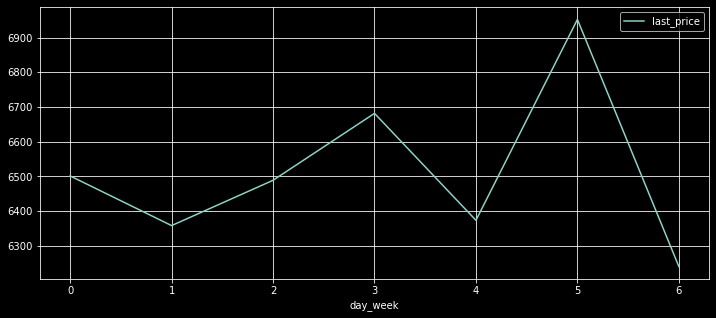

In [221]:
data.pivot_table(index = 'day_week', values = 'last_price').plot(grid = True, figsize = (12, 5))

In [222]:
data['day_week'].corr(data['last_price'])

0.002613970007781515

По корреляции взаимосвязь таких данных проследить не удастся. Показатель ничего не дает. 

По графику можно сказать, что пики приходятся на четверг и субботу. Суббота - наивысшая точка.
Из гистограммы ранее мы видели, что в выходные было наименьшее количество объявлений. Я предположила, что в течение недели этим занимаются агенты по недвижимости. Значит можно сделать вывод, что люди, не прибегающие к услугам агентов, возможно завышают цены по рынку.
Однако, в течение недели выкладываются объявления агентами с уменьшенными ценами - возможно для привлечения звонков клиентов, что может как раз занижать данные и иметь под собой основания для проверки таких объявлений, чтобы исключить мошеннические действия.

<AxesSubplot:xlabel='month'>

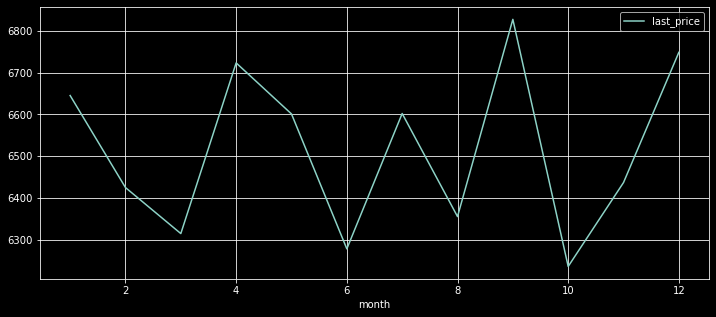

In [223]:
data.pivot_table(index = 'month', values = 'last_price').plot(grid = True, figsize = (12, 5))

Также основываясь на данных графика, можно сказать о том, что с начала года идут пики цен, которые взяли свое начало к новогодним праздникам. Возможно, люди к новому году переезжали, а свои квартиры выставляли на продажу, что повышало общие цены из-за повышенного количества. 
С января после праздников цены падали, заканчивая свое падение в марте - тут могли сыграть короткий месяц февраль и праздники в обоих месяцах.
Затем цены начинали расти, и снова, возможно, спадали из-за праздников - мая.
Оборот набирался в начале июня, но это самый низкий из пиков - возможно время отпусков.
Осенние месяца самые имеют самую высокую точку цены, затухая к ноябрю (опять же праздники) и беря оборот к новому году, чтобы продать перед новым годом для закрытия года.
Тут опять же могу сказать, что в общем и целом, на рынке недвижимости очень многое происходит не собственниками, а агентами. Соответственно, данный годовой график похож на производственный календарь. 
Даже если это не агенты, люди сами неохотно заполняют какиелибо данные в праздники, даже если это продажа их квартир. Также, возможно оставляют эти задачи на период после праздников или отпусков.

<AxesSubplot:xlabel='year'>

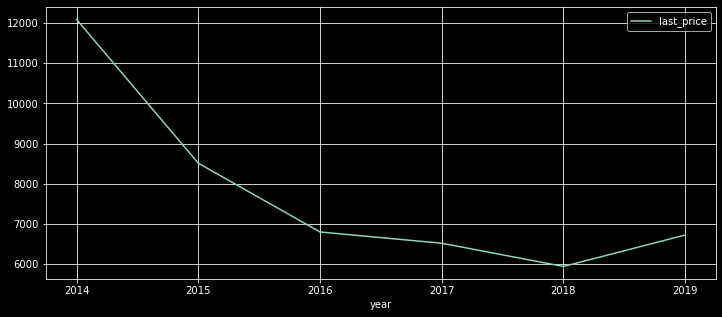

In [224]:
data.pivot_table(index = 'year', values = 'last_price').plot(grid = True, figsize = (12, 5))

Данные собраны за 5 лет. По графику можно сказать о том, что цены на квартиры сильно снизились с 2014 по 2018 года, и начали лишь немного расти после 2018 года к 2019 году.

### Средняя цена топ - 10 населенных пунктов по количеству объявлений

In [225]:
top_local = pd.DataFrame(data['locality_name'].value_counts().head(10))
top_local = top_local.reset_index()

In [226]:
top_local.columns = ['local', 'count']
top_local

,local,count
0,Санкт-Петербург,15688
1,Мурино,589
2,Кудрово,472
3,посёлок Шушары,440
4,Всеволожск,398
5,Пушкин,369
6,Колпино,338
7,посёлок Парголово,327
8,Гатчина,307
9,Выборг,237


In [227]:
local_list = top_local['local'].tolist()

In [228]:
(data
 .query('locality_name in @local_list')
 .pivot_table(index = 'locality_name', values = 'price_per', aggfunc = 'mean')
 .sort_values(by = 'price_per', ascending = False)
)

,price_per
locality_name,
Санкт-Петербург,114798.052939
Пушкин,103125.819377
Кудрово,95324.930508
посёлок Парголово,90175.913089
Мурино,86061.676978
посёлок Шушары,78677.364318
Колпино,75424.579112
Гатчина,68746.146515
Всеволожск,68654.473970


Объекты с самой высокой ценой, естественно, в самом Санкт-Петербурге. Стоимость м2 в нём - 114798 рублей. Недалеко расположился Пушкин - 103125 рублей за м2, хотя Кудрово, Парголово, Мурино и Шушары находятся ближе к центру, в черте города, примерно на КАДе. Возможно, на среднюю стоимость здесь повлияло количество объявлений. 
Также Пушкин и Колпино находятся примерно в одинаковых условиях - один радус отдаленности, крупные города Ленинградской области с населенностью  112 тыс. чел (Пушкин) и 151 тыс чел (Колпино). Количество объявлений также почти одинаково.
Возможно, фактором высокой стоимости квартир в городе Пушкин связано с достопримечательностями - Царское село, Екатерининский парк и т.п.
Последним в десятке количества объявлений по цене оказался Выборг. Можно отметить, что все населенные пункты выше находятся в черте Санкт-Петербурга или около того. Но Выборг находится 150 км от Санкт-Петербурга. Это может быть обусловлено также тем, что город имеют интересную архитектуру и т.п.

### Средняя стоимость квартиры на каждый километр удаления от центра Санкт- Петербурга

In [229]:
sanc = data[data['locality_name'] == 'Санкт-Петербург'].copy()

In [230]:
sanc = sanc[~(sanc['cityCenters_nearest'] == 88)].copy()

In [231]:
sanc

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per,day_week,month,year,fl_category
0,20,13000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18.863,16,1,482.0,2,755.0,2222.0,120370.37,3,3,2019,другой
2,10,5196.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21.741,13,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900.0,159.00,2015-07-24,3,2.65,14,91.18,9,True,False,False,27.66,0,Санкт-Петербург,28.098,6,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31.856,8,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой
7,5,7915.0,71.60,2019-04-18,2,2.65,24,41.06,22,True,False,False,18.90,2,Санкт-Петербург,23.982,11,0,4444.0,0,2222.0,2222.0,110544.69,3,4,2019,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550.0,35.30,2018-02-28,1,2.86,15,16.30,4,True,False,False,9.10,2,Санкт-Петербург,17.284,16,1,353.0,2,652.0,29.0,100566.57,2,2,2018,другой
23690,3,5500.0,52.00,2018-07-19,2,2.65,5,31.00,2,True,False,False,6.00,0,Санкт-Петербург,20.151,6,1,300.0,0,2222.0,15.0,105769.23,3,7,2018,другой
23691,11,9470.0,72.90,2016-10-13,2,2.75,25,40.30,7,True,False,False,10.60,1,Санкт-Петербург,19.424,4,0,4444.0,1,806.0,519.0,129903.98,3,10,2016,другой
23694,9,9700.0,133.81,2017-03-21,3,3.70,5,73.30,3,True,False,False,13.83,0,Санкт-Петербург,24.665,4,1,796.0,3,381.0,2222.0,72490.85,1,3,2017,другой


<AxesSubplot:xlabel='cityCenters_nearest'>

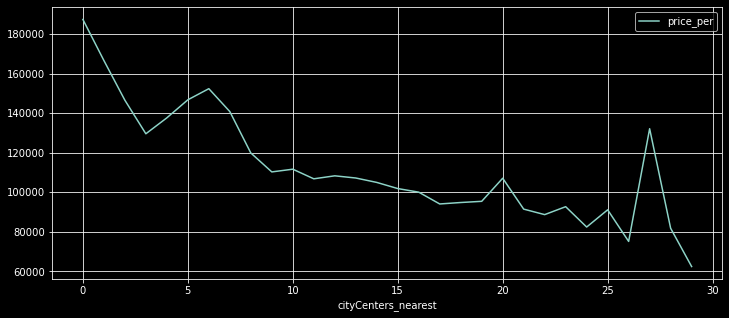

In [232]:
sanc.pivot_table(index = 'cityCenters_nearest', values = 'price_per').plot(grid = True, figsize = (12, 5))

Чем ближе к центру города, тем цена наиболее высокая. Тенденция высокой цены с нулевого километра от центра спадает примерно к 30 километрам от центра Санкт-Петербурга. Затем идет повышение цены практически до Питерских значений. Могу предположить, что квартиры удаленностью до 30 км еще относятся к Санкт-Петербургу, люди в основном живут в таких окраинах, но для работы нужно ездить в центр - это неудобно, занимает время и тратятся дополнительные деньги. Цена таких квартир ниже.


### Общий вывод

Проведя исследовательский анализ архива объявлений о продаже квартир в Санкт-Петербурге, можно сделать вывод: цена зависит от многих факторов, будь то площадь квартиры или день недели публикации объявления. 

Естественно, прямая зависимость между площадями квартиры, жилой зоны или кухонной зоны в большей или меньшей степени.
Количество комнат также влияет прямопропорционально на стоимость квартиры, но этот фактор обычно вытекает из общей площади.
Не все люди готовы покупать квартиру на первом этаже, продавцы вынуждены снижать цену, чтобы продать такую квартиру. Первый этаж как фактор, влияющий на стоимость обратнопропорционально.
Дни недели и месяцы также влияют на средние цены из-за уменьшенного количества объявлений в праздники и выходные. Еще дни неделю дают возможную наводку на работу агентов по недвижимости. Цена снижена в течение недели их работы для привлечения внимания клиентов. Не все агенты добросовестны, и здесь нужно проверять объявления перед публикацией сервисом. 

В центре города продаются квартиры с наибольшей ценой. Зависимость обратно пропорциональная: чем больше километров от центра города, тем квартиры дешевле.

В топ-10 населенных пунктов, отобранных по количеству объявлений и ранжированных по цене, вошли населенные пункты, которые отдалены от центра Санкт-Петербурга более чем на 30 км. Не все квартиры с высокой стоимостью собраны в Санкт-Петербурге, есть и такие населенные пункты как Пушкин, Кудрово, Парголово, которые могут сравняться по цене за м2 с Санкт-Петербургом.